# Problem Statement
### Predict customer churn whether a customer will leave (churn = 1) or stay (churn = 0) based on historical customer data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.Load Dataset

In [3]:
Data_churn = pd.read_csv("D:\\MyDesktop\\Machine_Learning\\SmartChurn\\Notebook\\Data\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
Data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.Data Overview

In [79]:
Data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
Data_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3.Check columns, missing values, duplicates

In [81]:
Data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
Data_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
Data_churn.duplicated().sum()

0

#### So the Dataset is clean with proper column names with having any null or duplicate values

## 4.Check Categorical and Numerical columns

In [84]:
pd.value_counts(Data_churn.select_dtypes(include=['int64','float64']).columns.tolist()).sum()

3

In [85]:
pd.value_counts(Data_churn.select_dtypes(include=['object']).columns.tolist()).sum()

18

In [86]:
# Unique values of each categorical column
categorical_cols = Data_churn.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(Data_churn[col].unique())
    print(f"Unique count: {Data_churn[col].nunique()}")
    print("-"*50)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique count: 7043
--------------------------------------------------
Column: gender
['Female' 'Male']
Unique count: 2
--------------------------------------------------
Column: Partner
['Yes' 'No']
Unique count: 2
--------------------------------------------------
Column: Dependents
['No' 'Yes']
Unique count: 2
--------------------------------------------------
Column: PhoneService
['No' 'Yes']
Unique count: 2
--------------------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
Unique count: 3
--------------------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
Unique count: 3
--------------------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Unique count: 3
--------------------------------------------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
Unique cou

#### From above observation "TotalCharges" consist float values but the datatype is object so that means it is containing some non-floating values

In [87]:
Data_churn[pd.to_numeric(Data_churn["TotalCharges"], errors="coerce").isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [88]:
## Removing the Non-floting values i.e empty string " ".
Data_churn = Data_churn[Data_churn["TotalCharges"].str.strip() != ""]

In [89]:
Data_churn["TotalCharges"] = pd.to_numeric(Data_churn["TotalCharges"])

In [90]:
print(Data_churn["TotalCharges"].unique())
print("Unique count:", Data_churn["TotalCharges"].nunique())

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Unique count: 6530


In [91]:
Data_churn[pd.to_numeric(Data_churn["TotalCharges"], errors="coerce").isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### As we can see now there are no rows with empty string in TotalCharges column

## 5.Separate numerical & categorical features

In [92]:
numerical_features = Data_churn.select_dtypes(include=['int64','float64']).columns.tolist()

In [93]:
categorical_features = Data_churn.select_dtypes(include=['object']).columns.tolist()

In [94]:
categorical_features.remove('customerID')  #remove non predictive ID

In [95]:
categorical_features.remove('Churn')  #target variable

## 6.Visualizing features

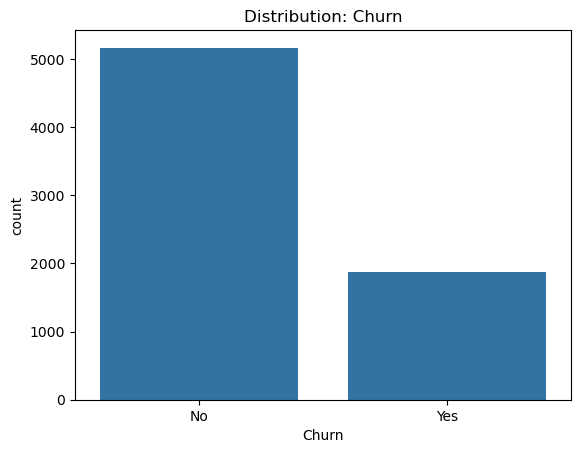

In [96]:
## Target Variable Analysis
sns.countplot(x='Churn',data=Data_churn)
plt.title("Distribution: Churn")
plt.show()

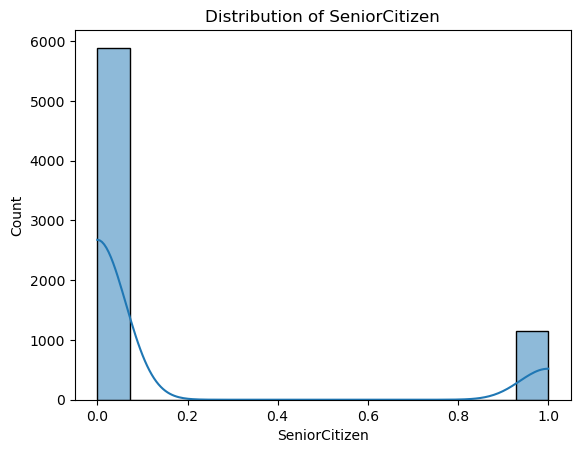

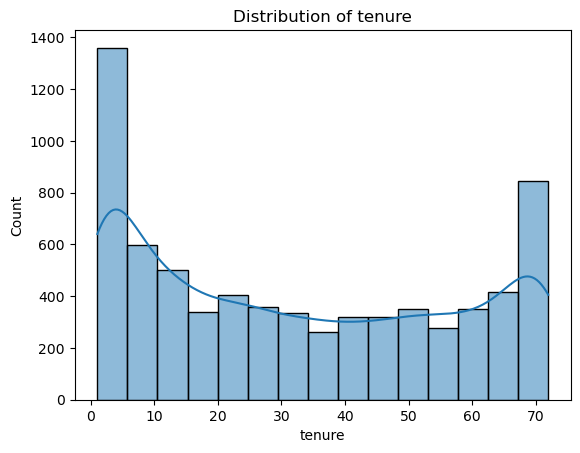

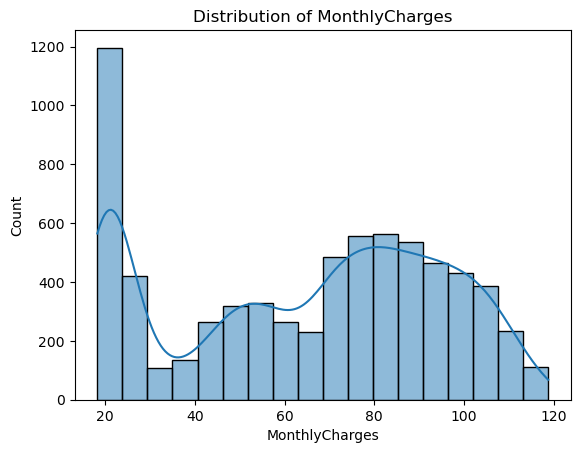

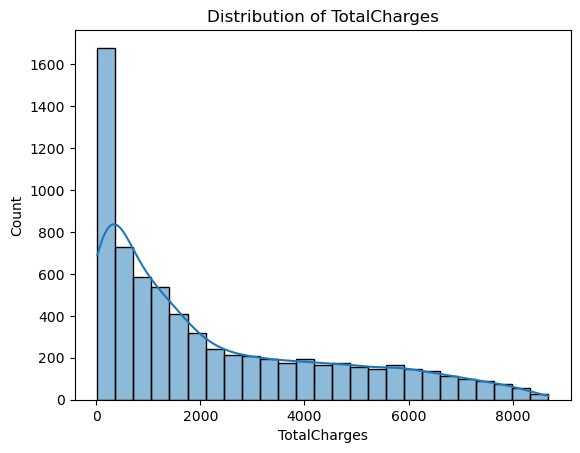

In [97]:
## Visualizing numerical features
for col in numerical_features:
    sns.histplot(Data_churn[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [117]:
## Check how monthly charges and tenure group affets the churning rate

In [114]:
Data_churn["MonthlyCharges"].max()

118.75

In [115]:
Data_churn["MonthlyCharges"].min()

18.25

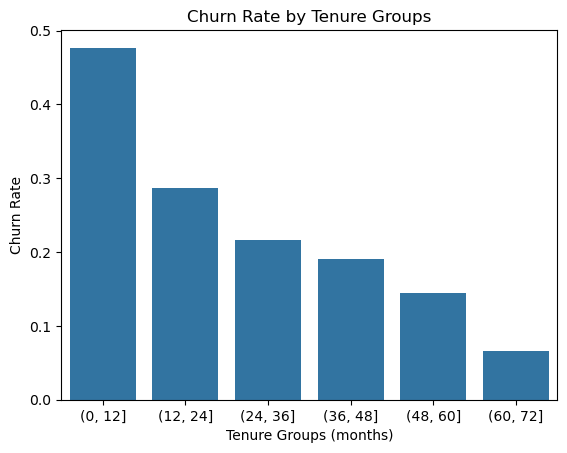

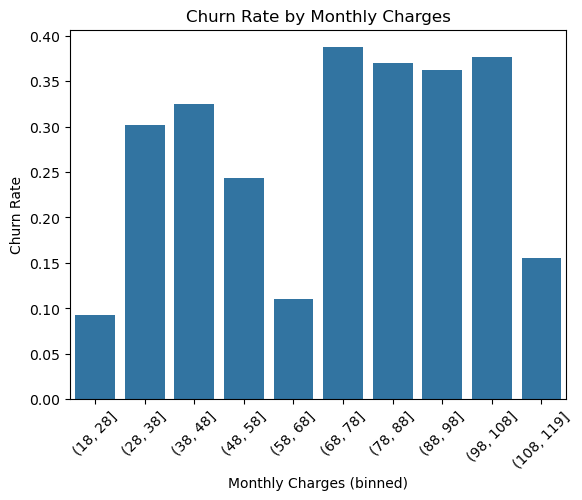

In [116]:
## Churn Rate by Tenure Groups
# Bin tenure
Data_churn["tenure_bin"] = pd.cut(Data_churn["tenure"], bins=[0,12,24,36,48,60,72])
# Calculate churn rate per bin
churn_rate_bin = Data_churn.groupby("tenure_bin")["Churn"].apply(lambda x: (x=="Yes").mean()).reset_index()
# Plot churn rate vs tenure bins
sns.barplot(x="tenure_bin", y="Churn", data=churn_rate_bin)
plt.title("Churn Rate by Tenure Groups")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Groups (months)")
plt.show()

## Churn Rate by Monthly Charges
# Bin MonthlyCharges
Data_churn["monthly_charges_bin"] = pd.cut(Data_churn["MonthlyCharges"], bins=[18,28,38,48,58,68,78,88,98,108,119])
# Calculate churn rate per bin
churn_rate_bin = Data_churn.groupby("monthly_charges_bin")["Churn"].apply(lambda x: (x=="Yes").mean()).reset_index()
# Plot churn rate vs MonthlyCharges bins
sns.barplot(x="monthly_charges_bin", y="Churn", data=churn_rate_bin)
plt.title("Churn Rate by Monthly Charges")
plt.ylabel("Churn Rate")
plt.xlabel("Monthly Charges (binned)")
plt.xticks(rotation=45)
plt.show()

#### Observation:- By visualizing we get that people between 20 to 60 'tenure' with less churning rate as they seems loyal to company 
#### but people with tenure below 20 and above 60 are often more likely to churn.

In [108]:
## churn rate within each gender.
# crosstab in pandas (pd.crosstab) is a function that creates a contingency table.
# It’s used to summarize the relationship between two (or more) categorical variables.
pd.crosstab(Data_churn['gender'], Data_churn['Churn'], normalize='index')

Churn,No,Yes
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


In [109]:
## churn changes for combinations (gender + partner).
pd.crosstab([Data_churn['gender'], Data_churn['Partner']], Data_churn['Churn'], normalize='index')

Churn                 No       Yes
gender Partner                    
Female No       0.655556  0.344444
       Yes      0.810458  0.189542
Male   No       0.684611  0.315389
       Yes      0.795322  0.204678

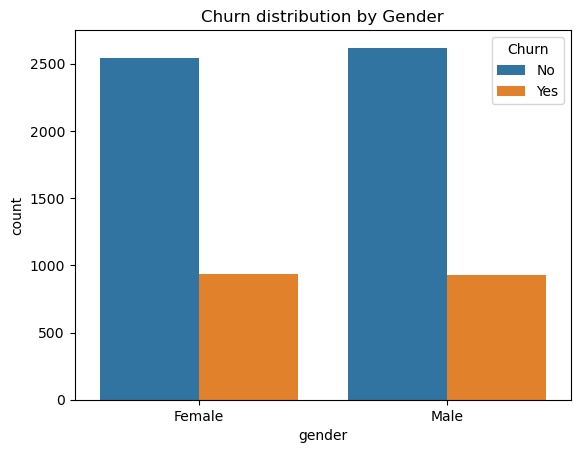

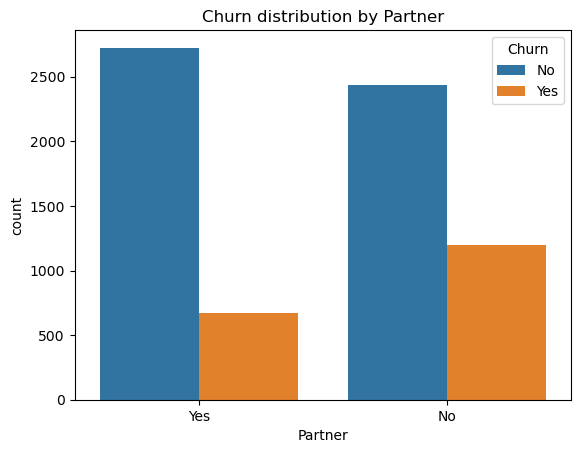

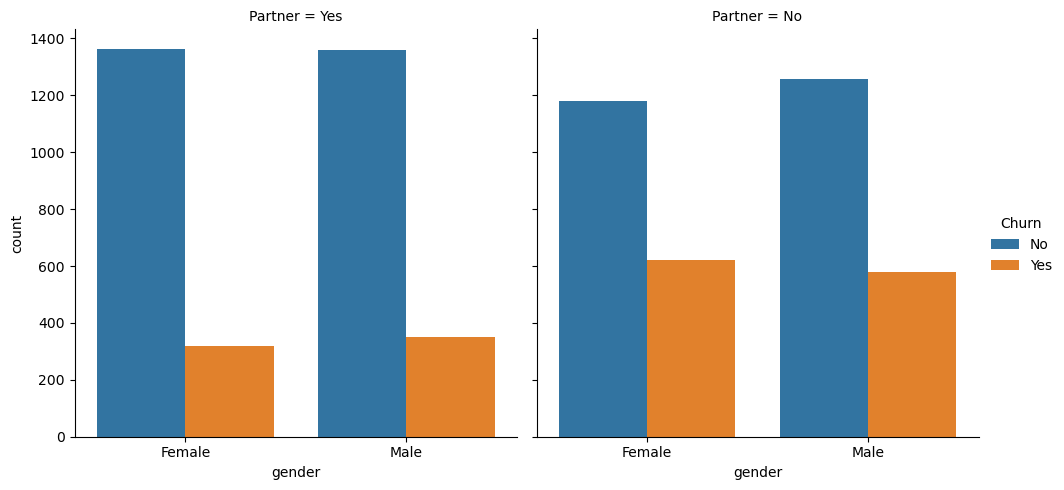

In [110]:
plt.figure()
sns.countplot(x='gender', hue='Churn', data=Data_churn)
plt.title("Churn distribution by Gender")
plt.show()

plt.figure()
sns.countplot(x='Partner', hue='Churn', data=Data_churn)
plt.title("Churn distribution by Partner")
plt.show()

# In Seaborn, sns.catplot() is a categorical plot function.
# It is a figure-level function (creates a whole plot, not just an axis).
# It is very flexible and works for categorical vs. categorical or categorical vs. numerical data.
sns.catplot(x='gender', hue='Churn', col='Partner', kind='count', data=Data_churn)
plt.show()

#### Observation:- from above analysis of crosstab and visualization the rate od change in female and male is almost same for churning but 
#### when it combines with gender there is a sudden drop in churning rate in both male and female

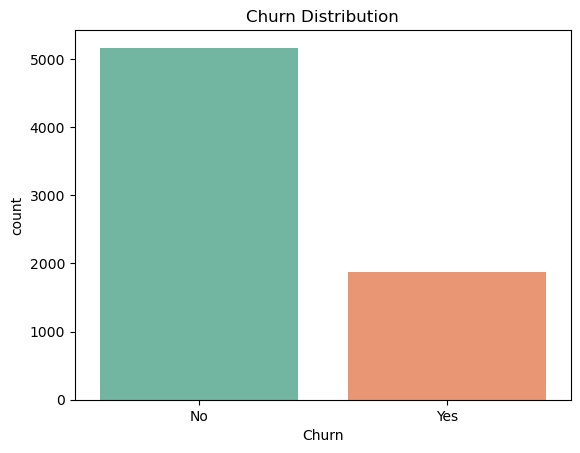

In [119]:
## Check for imbalanced Dataset
sns.countplot(x="Churn", data=Data_churn, palette="Set2")
plt.title("Churn Distribution")
plt.show()

#### Observation:- The Graph shows that the Dataset is imbalanced towards churn = "No". so we will try to tell the model 
#### to penalize mistakes on minority class more.

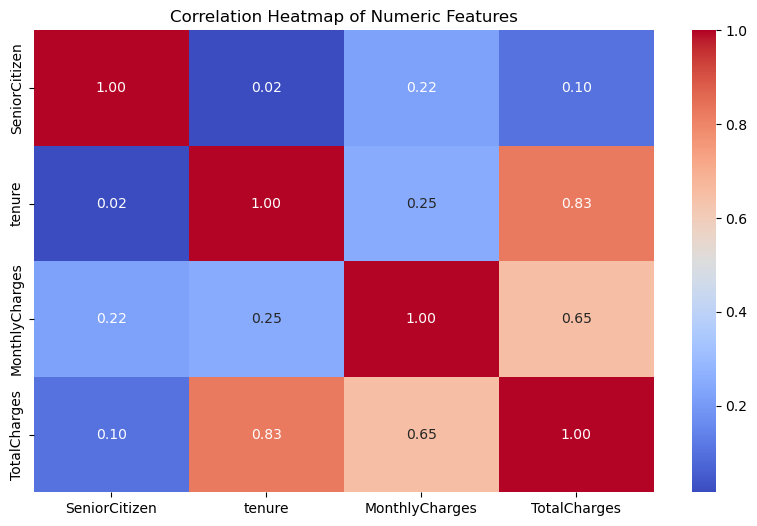

In [122]:
## check how numeric features are correlated to each other. 
numeric_features = Data_churn.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [120]:
Data_churn.to_csv("cleaned_churn_data.csv", index=False)